In [1]:
import numpy as np
from tqdm.notebook import tqdm

def calc_var(gamma, lamda, kappa, rho, sum_limit=int(1e3)):
    i = np.arange(sum_limit)

    # geometric series terms
    term1 = (gamma**2 * lamda**2)
    term2 = (gamma * lamda)

    sum1 = kappa * np.sum(term1 ** i)
    s = np.sum(term2 ** i)
    sum2 = kappa * (s * s)

    return (1 - rho) * sum1 + rho * sum2


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

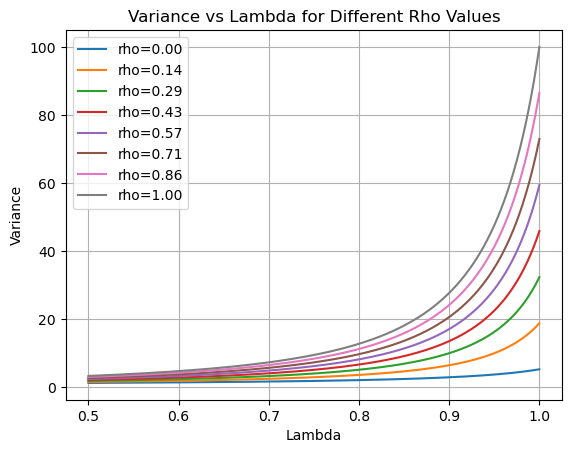

In [2]:
import matplotlib.pyplot as plt
gamma = 0.9
kappa = 1

rho_values = np.linspace(0, 1, 8)
lambda_values = np.linspace(0.5, 1, 1000)
for rho in rho_values:
    variances = []
    for lamda in tqdm(lambda_values, leave=False):
        var = calc_var(gamma, lamda, kappa, rho, sum_limit=1e3)
        variances.append(var)
    plt.plot(lambda_values, variances, label=f'rho={rho:.2f}')
plt.xlabel('Lambda')
plt.ylabel('Variance')
plt.title('Variance vs Lambda for Different Rho Values')
# plt.yscale('log')
# plt.xscale('log')
plt.legend()
plt.grid()
plt.show()

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

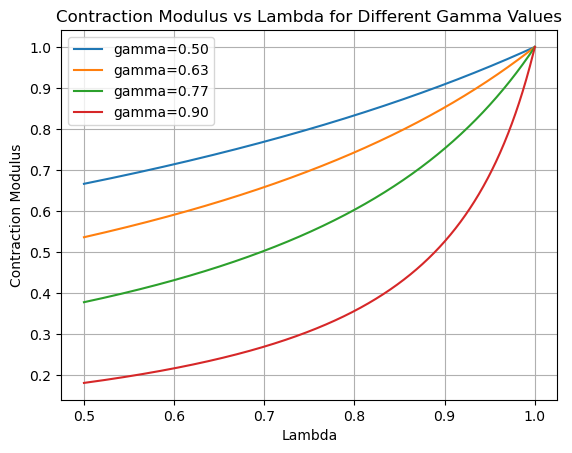

In [3]:
def calc_contraction_modulus(lamda, gamma, sum_limit=int(1e3)):
    # i = np.arange(1,sum_limit)
    # series = (1-lamda) * (gamma ** i) * (lamda ** (i - 1))
    # return np.sum(series)
    return gamma * (1 - lamda) / (1 - gamma * lamda)

gamma_values = np.linspace(0.5, 0.9, 4)
for gamma in gamma_values:
    contraction_moduli = []
    for lamda in tqdm(lambda_values, leave=False):
        cm = calc_contraction_modulus(lamda=lamda, gamma=gamma)
        contraction_moduli.append(1-cm)
    plt.plot(lambda_values, contraction_moduli, label=f'gamma={gamma:.2f}')
plt.xlabel('Lambda')
plt.ylabel('Contraction Modulus')
plt.title('Contraction Modulus vs Lambda for Different Gamma Values')
plt.legend()
plt.grid()
plt.show()

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

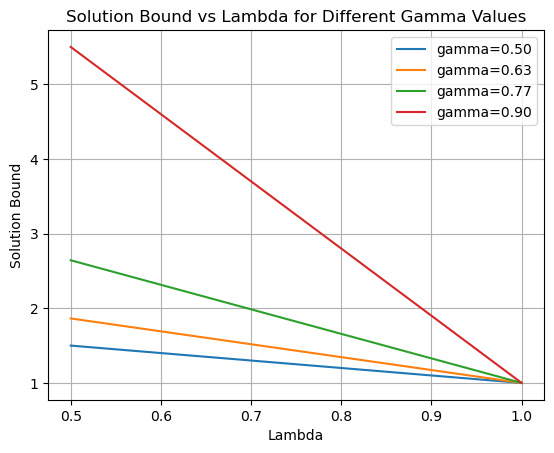

In [4]:
gamma_values = np.linspace(0.5, 0.9, 4)
for gamma in gamma_values:
    contraction_moduli = []
    for lamda in tqdm(lambda_values, leave=False):
        cm = calc_contraction_modulus(lamda=lamda, gamma=gamma)
        contraction_moduli.append(1/(1-cm))
    plt.plot(lambda_values, contraction_moduli, label=f'gamma={gamma:.2f}')
plt.xlabel('Lambda')
plt.ylabel('Solution Bound')
plt.title('Solution Bound vs Lambda for Different Gamma Values')
plt.legend()
plt.grid()
plt.show()